# RM branch with attached photographs

Creates the Entity-relationships diagram (ERD) of EAMENA Heritage Places (HP) and color nodes according to the [mds-template-readonly.tsv](https://github.com/eamena-project/eamena-arches-dev/blob/main/dbs/database.eamena/data/reference_data/mds/mds-template-readonly.tsv) file (see: [GitHub documentation](https://github.com/eamena-project/eamena-arches-dev/tree/main/dbs/database.eamena/data/reference_data#templates))

Load GitHub repository, requirements and libraries

In [1]:
# download ACHP graph_mixer
!rm cultural-heritage -R
!git clone https://github.com/achp-project/cultural-heritage.git
!pip install  -q -r  cultural-heritage/graph-parser/requirements.txt
%cd /content/cultural-heritage/graph-parser/
import graph_mixer as gm

# download EAMENA erms
%cd /content/
!rm eamena-functions -R
!git clone https://github.com/eamena-project/eamena-functions.git
%cd /content/eamena-functions/mds
import mds

# download EAMENA data
%cd /content/
!rm /content/eamena-data -R
!git clone https://github.com/eamena-project/eamena-data.git

# librairies
import os
import urllib.request
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact, interactive
from IPython.display import Image as IpImg
from IPython.display import Markdown, display, HTML, clear_output
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import re
from pyvis import network as net
import folium
import json
from google.colab import files
import random

!pip install exif
from exif import Image as exImg

rm: cannot remove 'cultural-heritage': No such file or directory
Cloning into 'cultural-heritage'...
remote: Enumerating objects: 3290, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 3290 (delta 11), reused 7 (delta 3), pack-reused 3260
Receiving objects: 100% (3290/3290), 36.74 MiB | 19.05 MiB/s, done.
Resolving deltas: 100% (2397/2397), done.
Updating files: 100% (661/661), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.0/143.0 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.0/157.0 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.3/300.3 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

## Select

Select the EAMENA HP Resource Model (RM) within the listed RMs

List of available RMs

In [57]:
%cd /content/cultural-heritage/graph-parser/
!rm inputResourceModels -R
!mkdir -p inputResourceModels
remote_source_files_1 = dict()
# src = 'https://raw.githubusercontent.com/eamena-project/eamena-arches-dev/main/dbs/ea.train/data/reference_data/rm/hp/Heritage%20Place.json'
src = 'https://raw.githubusercontent.com/eamena-project/eamena-arches-dev/main/dbs/ea.train/data/reference_data/rm/hp/Sub-typology-branch.json'
remote_source_files_1['EAMENA'] = src
gm.rm_selected_one('EAMENA', remote_source_files_1)

/content/cultural-heritage/graph-parser
EAMENA_Sub-typology-branch.json has been loaded into the folder inputResourceModels/


In [58]:
!ls '/content/cultural-heritage/graph-parser/inputResourceModels/'

EAMENA_Sub-typology-branch.json


In [59]:
with open('/content/cultural-heritage/graph-parser/inputResourceModels/EAMENA_Sub-typology-branch.json', 'r') as file:
    data = json.load(file)
    print(json.dumps(data, indent=4))  # This prints the JSON data formatted nicely


{
    "graph": [
        {
            "author": " ",
            "cards": [
                {
                    "active": true,
                    "cardid": "5c02c61f-f77b-401c-bcab-6814b89448ad",
                    "component_id": "f05e4d3a-53c1-11e8-b0ea-784f435179ea",
                    "config": null,
                    "constraints": [],
                    "cssclass": null,
                    "description": {
                        "en": ""
                    },
                    "graph_id": "0f0e2b0a-e7f5-4bab-b996-98ddb709e9dc",
                    "helpenabled": false,
                    "helptext": {
                        "en": null
                    },
                    "helptitle": {
                        "en": null
                    },
                    "instructions": {
                        "en": null
                    },
                    "is_editable": true,
                    "name": {
                        "en": "Sub-typology"
      

## Read

Create subgraph and comparison dataframe csv files by running [graph-parser.py](https://github.com/achp-project/cultural-heritage/blob/main/graph-parser/graph_parser.py) and [graph-comparator.py](https://github.com/achp-project/cultural-heritage/blob/main/graph-parser/graph_comparator.py)

In [60]:
!python /content/cultural-heritage/graph-parser/graph_comparator.py -d -m list -o subgraphMetrics.csv inputResourceModels/*.json
subgraph_metrics = pd.read_csv('subgraphMetrics.csv')
subgraph_metrics

,Unnamed: 0,graph_name,graph_id,source_property,target_property,relation_type,source_id,target_id,source_name,target_name
0,0,EAMENA_Sub-typology-branch,0f0e2b0a-e7f5-4bab-b996-98ddb709e9dc,E1_CRM_Entity,E55_Type,P2_has_type,2a71ad42-1366-11ef-a316-f3df69eec361,9cf430e2-1366-11ef-a316-f3df69eec361,Sub-typology,Others
1,1,EAMENA_Sub-typology-branch,0f0e2b0a-e7f5-4bab-b996-98ddb709e9dc,E1_CRM_Entity,E55_Type,P2_has_type,2a71ad42-1366-11ef-a316-f3df69eec361,6f7887c6-1366-11ef-a316-f3df69eec361,Sub-typology,Kites


> Note the the UUID of the root node of the branch is different from the UUID of the corresponding node in the RM, this can be changed

In [61]:
# replace the UUID of the node root in the branch, to match with the RM ########
subgraph_metrics.replace('2a71ad42-1366-11ef-a316-f3df69eec361', '34cfea58-c2c0-11ea-9026-02e7594ce0a0', inplace=True)
subgraph_metrics.to_csv('subgraphMetrics.csv', index=False)
subgraph_metrics

,Unnamed: 0,graph_name,graph_id,source_property,target_property,relation_type,source_id,target_id,source_name,target_name
0,0,EAMENA_Sub-typology-branch,0f0e2b0a-e7f5-4bab-b996-98ddb709e9dc,E1_CRM_Entity,E55_Type,P2_has_type,34cfea58-c2c0-11ea-9026-02e7594ce0a0,9cf430e2-1366-11ef-a316-f3df69eec361,Sub-typology,Others
1,1,EAMENA_Sub-typology-branch,0f0e2b0a-e7f5-4bab-b996-98ddb709e9dc,E1_CRM_Entity,E55_Type,P2_has_type,34cfea58-c2c0-11ea-9026-02e7594ce0a0,6f7887c6-1366-11ef-a316-f3df69eec361,Sub-typology,Kites


## Show

In [70]:
rm_project= 'EAMENA'
filename = rm_project + "-branch-erd.html"
# mds_template_df = mds.mds_template()
# mds_template_df['Enhanced record minimum standard'] = mds_template_df['Enhanced record minimum standard'].str.contains(r'Yes', case = False, na = False, regex = True).astype(int)
# mds_template_df = mds_template_df.loc[mds_template_df['Enhanced record minimum standard'] == 1]
# in_erms = list(mds_template_df['uuid_sql'])
# G = gm.create_rm_graph(rm_project= rm_project, color_fields = mds_template_df)
G = gm.create_rm_graph(rm_project= rm_project)
hp_G = gm.plot_net_graph(G, filename = filename, width = "1200px", height = "1000px")
HTML(filename = filename)

## Export

In [ ]:
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---

In [41]:
# cases_path = "/content/eamena-data/reference-data/concepts/heritage_places/cases/"
cases_img_path = "https://raw.githubusercontent.com/eamena-project/eamena-data/main/reference-data/concepts/heritage_places/cases/img/" # cases_path + "img/"
# list
list_path = 'https://raw.githubusercontent.com/eamena-project/eamena-data/main/reference-data/concepts/heritage_places/cases/list-branch.tsv'

In [43]:
df_list = pd.read_csv(list_path, sep='\t')
df_list['image_path'] = cases_img_path + df_list['image']
df_list

,label,image,uuid,uuid_parent,image_path
0,Kite type - Star-shaped,kitetype-star.png,f4f0052e-2cfe-4550-b43a-96d1d0ac8846,6f7887c6-1366-11ef-a316-f3df69eec361,https://raw.githubusercontent.com/eamena-proje...
1,Kite type - Rounded Arrow,kitetype-roundedarrow.png,f5ba6ff6-e304-4995-afe8-8e36537dcbc6,6f7887c6-1366-11ef-a316-f3df69eec361,https://raw.githubusercontent.com/eamena-proje...
2,Kite type - Bag-shaped,kitetype-bag.png,21dc0d6e-1c00-4d92-8bc2-0e021d088ffb,6f7887c6-1366-11ef-a316-f3df69eec361,https://raw.githubusercontent.com/eamena-proje...
3,Kite type - Sock-shaped,kitetype-sock.png,1e300266-a07a-4354-98ae-9b24acf4fecf,6f7887c6-1366-11ef-a316-f3df69eec361,https://raw.githubusercontent.com/eamena-proje...
4,Kite type - Trapezoid,kitetype-trapezoid.png,644e7793-4653-428c-86c8-2b8fb044488b,6f7887c6-1366-11ef-a316-f3df69eec361,https://raw.githubusercontent.com/eamena-proje...


**1e300266-a07a-4354-98ae-9b24acf4fecf**

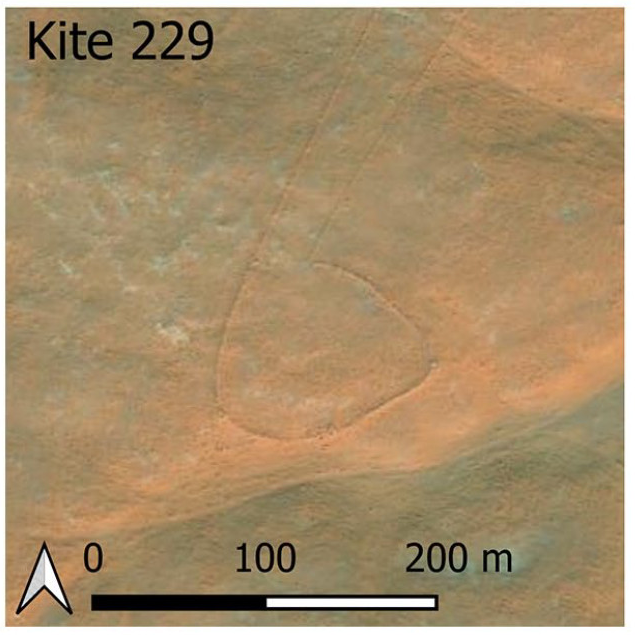

**Kite type - Sock-shaped**

In [44]:
my_range = range(1, len(df_list))
i = random.sample(my_range, 1)[0]
display(Markdown(f"**{df_list.loc[i, 'uuid']}**"))
display(IpImg(df_list.loc[i, 'image_path']))
display(Markdown(f"**{df_list.loc[i, 'label']}**"))

In [71]:
G.nodes

NodeView(('34cfea58-c2c0-11ea-9026-02e7594ce0a0', '9cf430e2-1366-11ef-a316-f3df69eec361', '6f7887c6-1366-11ef-a316-f3df69eec361'))

In [85]:
# OK
# rm_project= 'EAMENA'
# filename = rm_project + "-erd-concepts.html"
# mds_template_df = mds.mds_template()
# mds_template_df['Enhanced record minimum standard'] = mds_template_df['Enhanced record minimum standard'].str.contains(r'Yes', case = False, na = False, regex = True).astype(int)
# mds_template_df = mds_template_df.loc[mds_template_df['Enhanced record minimum standard'] == 1]
# in_erms = list(mds_template_df['uuid_sql'])
# G = gm.create_rm_graph(rm_project= rm_project, color_fields = mds_template_df)
# # create the graph of images
G1 = gm.create_img_graph(G = G, mass = 5, size = 30, list_path = 'https://raw.githubusercontent.com/eamena-project/eamena-data/main/reference-data/concepts/heritage_places/cases/list-branch.tsv')
# merge with the RM graph
G_merged = nx.compose(G, G1)
hp_G = gm.plot_net_graph(G_merged, filename = filename, width = "1200px", height = "1000px")
HTML(filename = filename)

*read: 6f7887c6-1366-11ef-a316-f3df69eec361


In [47]:
!ls /content/cultural-heritage/graph-parser/

'(archives)'	      'MAPHSA Heritage Item_forceTree.html'   requirements.txt
 docs		      'MAPHSA Heritage Item_g_edges.csv'      sourceGraphData
 EAMENA-erd.html      'MAPHSA Heritage Item.gexf'	      subgraphMetrics.csv
 graph_comparator.py  'MAPHSA Heritage Item_g_nodes.csv'      subgraphMetricsEA.csv
 graph_mixer.py       'MAPHSA Heritage Item.html'	      temp_1.ttl
 graph_parser.py       project_meta.json		      templates
 graph_rdf.py	       __pycache__			      temp.ttl
 inputResourceModels   README.md			      treeHTML


In [74]:
my_rm = 'EAMENA'
%cd /content/cultural-heritage/graph-parser/
# !rm inputResourceModels -R
# !mkdir -p inputResourceModels
gm.rm_selected_one(my_rm, gm.rm_list())
!python /content/cultural-heritage/graph-parser/graph_comparator.py -d -m list -o subgraphMetricsEA.csv inputResourceModels/*.json
subgraph_metrics = pd.read_csv('subgraphMetricsEA.csv') #useful?
mds_template_df = mds.mds_template()
mds_template_df['Enhanced record minimum standard'] = mds_template_df['Enhanced record minimum standard'].str.contains(r'Yes', case = False, na = False, regex = True).astype(int)
mds_template_df = mds_template_df.loc[mds_template_df['Enhanced record minimum standard'] == 1]
in_erms = list(mds_template_df['uuid_sql'])
G2 = gm.create_rm_graph(subgraph_metrics = 'subgraphMetricsEA.csv', rm_project= rm_project, color_fields = mds_template_df)

/content/cultural-heritage/graph-parser
EAMENA_Heritage%20Place.json has been loaded into the folder inputResourceModels/


In [75]:
# !python /content/cultural-heritage/graph-parser/graph_comparator.py -d -m list -o subgraphMetrics.csv inputResourceModels/*.json
subgraph_metrics = pd.read_csv('subgraphMetricsEA.csv')
subgraph_metrics

,Unnamed: 0,graph_name,graph_id,source_property,target_property,relation_type,source_id,target_id,source_name,target_name
0,0,EAMENA_Heritage%20Place,34cfe98e-c2c0-11ea-9026-02e7594ce0a0,E27_Site,E53_Place,P53_has_former_or_current_location,34cfea3b-c2c0-11ea-9026-02e7594ce0a0,34cfe9b6-c2c0-11ea-9026-02e7594ce0a0,Heritage Place,Geography
1,1,EAMENA_Heritage%20Place,34cfe98e-c2c0-11ea-9026-02e7594ce0a0,E27_Site,E53_Place,P53_has_former_or_current_location,34cfea3b-c2c0-11ea-9026-02e7594ce0a0,3080eebe-c2c5-11ea-9026-02e7594ce0a0,Heritage Place,Geometry
2,2,EAMENA_Heritage%20Place,34cfe98e-c2c0-11ea-9026-02e7594ce0a0,E54_Dimension,E60_Number,P90_has_value,34cfea1f-c2c0-11ea-9026-02e7594ce0a0,34cfea40-c2c0-11ea-9026-02e7594ce0a0,Depth/Elevation,Minimum Depth/Max Elevation
3,3,EAMENA_Heritage%20Place,34cfe98e-c2c0-11ea-9026-02e7594ce0a0,E54_Dimension,E60_Number,P90_has_value,34cfea1f-c2c0-11ea-9026-02e7594ce0a0,34cfea42-c2c0-11ea-9026-02e7594ce0a0,Depth/Elevation,Maximum Depth/Min Elevation
4,4,EAMENA_Heritage%20Place,34cfe98e-c2c0-11ea-9026-02e7594ce0a0,E54_Dimension,E60_Number,P90_has_value,34cfea8c-c2c0-11ea-9026-02e7594ce0a0,34cfea47-c2c0-11ea-9026-02e7594ce0a0,Dimension,Measurement Number
...,...,...,...,...,...,...,...,...,...,...
156,156,EAMENA_Heritage%20Place,34cfe98e-c2c0-11ea-9026-02e7594ce0a0,I2_Belief,I2_Belief,P117i_includes,38cff734-c77b-11ea-a292-02e7594ce0a0,38cff731-c77b-11ea-a292-02e7594ce0a0,Cultural Period Belief,Cultural Sub-period Belief
157,157,EAMENA_Heritage%20Place,34cfe98e-c2c0-11ea-9026-02e7594ce0a0,I2_Belief,E13_Attribute_Assignment,P117i_includes,34cfe9d4-c2c0-11ea-9026-02e7594ce0a0,34cfe9d7-c2c0-11ea-9026-02e7594ce0a0,Recommendation Plan,Priority Assignment
158,158,EAMENA_Heritage%20Place,34cfe98e-c2c0-11ea-9026-02e7594ce0a0,E3_Condition_State,E16_Measurement,P117i_includes,34cfea6f-c2c0-11ea-9026-02e7594ce0a0,34cfe9bf-c2c0-11ea-9026-02e7594ce0a0,Condition State,Estimated Damage Extent
159,159,EAMENA_Sub-typology-branch,0f0e2b0a-e7f5-4bab-b996-98ddb709e9dc,E1_CRM_Entity,E55_Type,P2_has_type,2a71ad42-1366-11ef-a316-f3df69eec361,9cf430e2-1366-11ef-a316-f3df69eec361,Sub-typology,Others


In [81]:
G_merged.nodes()

NodeView(('34cfea58-c2c0-11ea-9026-02e7594ce0a0', '9cf430e2-1366-11ef-a316-f3df69eec361', '6f7887c6-1366-11ef-a316-f3df69eec361', 'f4f0052e-2cfe-4550-b43a-96d1d0ac8846', 'f5ba6ff6-e304-4995-afe8-8e36537dcbc6', '21dc0d6e-1c00-4d92-8bc2-0e021d088ffb', '1e300266-a07a-4354-98ae-9b24acf4fecf', '644e7793-4653-428c-86c8-2b8fb044488b'))

In [77]:
G1.nodes()

NodeView(('f4f0052e-2cfe-4550-b43a-96d1d0ac8846', 'f5ba6ff6-e304-4995-afe8-8e36537dcbc6', '21dc0d6e-1c00-4d92-8bc2-0e021d088ffb', '1e300266-a07a-4354-98ae-9b24acf4fecf', '644e7793-4653-428c-86c8-2b8fb044488b', '6f7887c6-1366-11ef-a316-f3df69eec361'))

In [78]:
G2.nodes()

NodeView(('34cfea3b-c2c0-11ea-9026-02e7594ce0a0', '34cfe9b6-c2c0-11ea-9026-02e7594ce0a0', '3080eebe-c2c5-11ea-9026-02e7594ce0a0', '34cfea1f-c2c0-11ea-9026-02e7594ce0a0', '34cfea40-c2c0-11ea-9026-02e7594ce0a0', '34cfea42-c2c0-11ea-9026-02e7594ce0a0', '34cfea8c-c2c0-11ea-9026-02e7594ce0a0', '34cfea47-c2c0-11ea-9026-02e7594ce0a0', '34cfe9b9-c2c0-11ea-9026-02e7594ce0a0', '34cfea10-c2c0-11ea-9026-02e7594ce0a0', '34cfe9b3-c2c0-11ea-9026-02e7594ce0a0', '34cfea13-c2c0-11ea-9026-02e7594ce0a0', '34cfe98f-c2c0-11ea-9026-02e7594ce0a0', '34cfe9ad-c2c0-11ea-9026-02e7594ce0a0', '34cfe9c8-c2c0-11ea-9026-02e7594ce0a0', '3d218500-c385-11ea-9026-02e7594ce0a0', '34cfe9a4-c2c0-11ea-9026-02e7594ce0a0', '34cfea22-c2c0-11ea-9026-02e7594ce0a0', '34cfea37-c2c0-11ea-9026-02e7594ce0a0', '34cfe9aa-c2c0-11ea-9026-02e7594ce0a0', '34cfe9c2-c2c0-11ea-9026-02e7594ce0a0', '34cfea3a-c2c0-11ea-9026-02e7594ce0a0', '34cfea61-c2c0-11ea-9026-02e7594ce0a0', '34cfea5b-c2c0-11ea-9026-02e7594ce0a0', '34cfea34-c2c0-11ea-9026-02e75

In [89]:
# G_merged.remove_node('34cfea58-c2c0-11ea-9026-02e7594ce0a0')
G_merged.nodes['34cfea58-c2c0-11ea-9026-02e7594ce0a0']

{'crm': 'E1_CRM_Entity',
 'id': '34cfea58-c2c0-11ea-9026-02e7594ce0a0',
 'name': 'Sub-typology',
 'label': 'Sub-typology',
 'title': 'E1 CRM Entity',
 'size': 10}

In [91]:
G2.nodes['34cfea58-c2c0-11ea-9026-02e7594ce0a0']

{'crm': 'I4_Proposition_Set',
 'id': '34cfea58-c2c0-11ea-9026-02e7594ce0a0',
 'name': 'Site Feature Interpretation Type',
 'label': 'Site Feature Interpretation Type',
 'title': 'I4 Proposition Set',
 'color': '#66a61e'}

In [96]:
G_merged2.nodes['34cfea58-c2c0-11ea-9026-02e7594ce0a0']

{'crm': 'I4_Proposition_Set',
 'id': '34cfea58-c2c0-11ea-9026-02e7594ce0a0',
 'name': 'Site Feature Interpretation Type',
 'label': 'Site Feature Interpretation Type',
 'title': 'I4 Proposition Set',
 'size': 10,
 'color': '#66a61e'}

'2a71ad42-1366-11ef-a316-f3df69eec361'

In [98]:
# G_merged = nx.compose(G, G1)
filename = "All-branch-erd.html"
G_merged2 = nx.compose(G_merged, G2)
G_merged2.remove_node('2a71ad42-1366-11ef-a316-f3df69eec361')
hp_G = gm.plot_net_graph(G_merged2, filename = filename, width = "1200px", height = "1000px")
HTML(filename = filename)

## Utilities

In [ ]:
def find_node_by_attribute(graph, attribute, value):
    # Iterate through all nodes and their attributes in the graph
    for node, attrs in graph.nodes(data=True):
        if attribute in attrs and attrs[attribute] == value:
            return node
    return None  # Return None if no node matches the criteria

find_node_by_attribute(G_merged2, 'name', 'Sub-typology')